# その他のデータフレーム操作

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

## 練習問題

次の関数 coin_game は、所持金と掛け金を引数に渡すと、1/2の確率で掛け金の分だけ所持金が増減した値が返ります。

In [2]:
from numpy.random import randint
def coin_game(money, bet):
    coin = randint(2)
    if coin == 0:
        money += bet
    else:
        money -= bet
    return money

次は、1000円の所持金において、100円を賭けた場合の結果を示します。

In [3]:
money = 1000
money = coin_game(money, 100)
money

1100

(1) 所持金1000円からスタートして、所持金の50%を賭け続けた場合の所持金の変化をリスト trial に格納してください。（全部で100回繰り返します。）

In [4]:
money = 1000
trial = []
for i in range(100):
    money = coin_game(money, int(money*0.5))
    trial.append(money)
    
trial[:10]

[1500, 750, 375, 562, 281, 141, 211, 316, 158, 237]

(2) (1)の処理を3回繰り返して、それぞれの結果を列（trial0, trial1, trial2）とするDataFrameを作成して、変数 df に格納してください。また、その結果をグラフ表示してください。

In [5]:
df = DataFrame()
for t in range(3):
    money = 1000
    trial = []
    for i in range(100):
        money = coin_game(money, int(money*0.5))
        trial.append(money)
    df = pd.concat([df, Series(trial, name=('trial%d' % t))], axis=1)

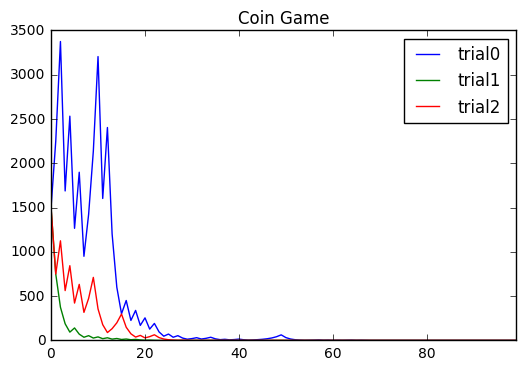

In [6]:
df.plot(title='Coin Game')

(3) 関数 coin_game を修正して、1/2の確率で「掛け金の分だけ所持金が増加する」もしくは「掛け金の半分だけ所持金が減少」ようにしてください。修正後の関数名は stock_game とします。（これは、掛け金の分だけ株を購入したところ、1/2の確率が株価が倍、もしくは、半分になる状況をシュミレーションしています。）

In [7]:
def stock_game(money, bet):
    coin = randint(2)
    if coin == 0:
        money += bet
    else:
        money -= int(bet/2)
    return money

(4) (3)の関数を用いて、(2)と同様のグラフを作成してください。

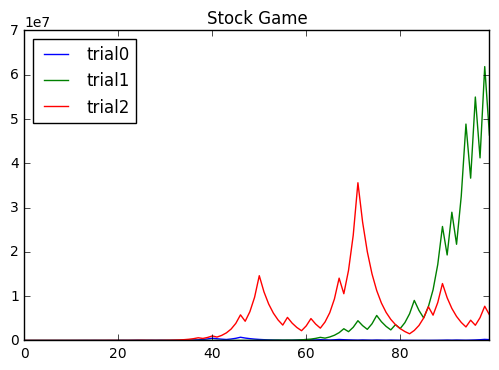

In [8]:
result = DataFrame()
for t in range(3):
    money = 1000
    trial = []
    for i in range(100):
        money = stock_game(money, int(money*0.5))
        trial.append(money)
    result = pd.concat([result, Series(trial, name=('trial%d' % t))], axis=1)
result.plot(title='Stock Game')    